<a href="https://colab.research.google.com/github/cagBRT/Machine-Learning/blob/master/wolvesAndCows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagine you're a farmer and you have a problem--you need to setup a fence to protect your cows from packs of wovles. But where do you build your fence? 

In [48]:
!git clone -l -s https://github.com/cagBRT/Machine-Learning.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 741 (delta 16), reused 0 (delta 0), pack-reused 708
Receiving objects: 100% (741/741), 26.97 MiB | 20.29 MiB/s, done.
Resolving deltas: 100% (457/457), done.
/content/cloned-repo/cloned-repo
 Admission_Predict.csv		       LogisticRegression_1.ipynb
 bank.csv			       Logistic_Regression_3.ipynb
 bank-full.csv			       Logistic_Regression_4.ipynb
 blue_line.jpg			       LogReg_Titanic.ipynb
 boston_housing.csv		       Mall_Customers.csv
 breast_cancer_data.csv		       NaiveBayesBernoulli.ipynb
 cardata.data			       NaiveBayesGaussian2.ipynb
 cows_and_wolves.txt		       NaiveBayesGaussian.ipynb
 diabetesML.ipynb		       NaiveBayesMultinomialNB2.ipynb
 dogOrMuffin.ipynb		       NaiveBayesMultinomialNB.ipynb
 fashion-mnist-sprite.png	       naiveBayes.png
 height_weight.csv		       pima_indians_diabetes.csv
 Hiera

Import the necessary libraries

In [49]:
import numpy as np
import pylab as pl
from sklearn import svm
from sklearn import linear_model
from sklearn import tree
import pandas as pd

Define a Python function for plotting the data and models

In [50]:
def plot_results_with_hyperplane(clf, clf_name, df, plt_nmbr):
 x_min, x_max = df.x.min() - .5, df.x.max() + .5
 y_min, y_max = df.y.min() - .5, df.y.max() + .5

 # step between points. i.e. [0, 0.02, 0.04, ...]
 step = .02
 # to plot the boundary, we're going to create a matrix of every possible point
 # then label each point as a wolf or cow using our classifier
 xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 # this gets our predictions back into a matrix
 Z = Z.reshape(xx.shape)

 # create a subplot (we're going to have more than 1 plot on a given image)
 #pl.subplot(2, 2, plt_nmbr)
 # plot the boundaries
 pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired)

 # plot the wolves and cows
 for animal in df.animal.unique():
    pl.scatter(df[df.animal==animal].x,
    df[df.animal==animal].y,
    marker=animal,
    label="cows" if animal=="x" else "wolves",
    color='black')

 pl.title(clf_name)
 pl.legend(loc="best")

Get the data

In [51]:
data = open("cows_and_wolves.txt").read()
data = [row.split('\t') for row in data.strip().split('\n')]


Prepare the data for ML

In [53]:
animals = []
for y, row in enumerate(data):
    for x, item in enumerate(row):
        # x's are cows, o's are wolves
        if item in ['o', 'x']:
            animals.append([x, y, item])

In [54]:

# Data driven farmer goes to the Rodeo
df = pd.DataFrame(animals, columns=["x", "y", "animal"])
df['animal_type'] = df.animal.apply(lambda x: 0 if x=="x" else 1)

# train using the x and y position coordiantes
train_cols = ["x", "y"]

clfs = {
  "Logistic Reg" : linear_model.LogisticRegression(),
  "Decision Tree": tree.DecisionTreeClassifier(),
  "SVM": svm.SVC()
}

plt_nmbr = 1

Plot the wolves and cows

<function matplotlib.pyplot.show>

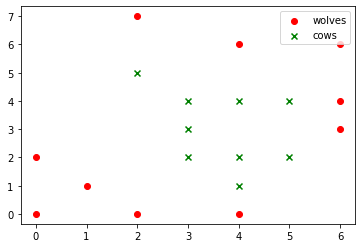

In [55]:
 # plot the wolves and cows
 for animal in df.animal.unique():
    pl.scatter(df[df.animal==animal].x,
    df[df.animal==animal].y,
    marker=animal,
    label="cows" if animal=="x" else "wolves",
    color='green'if animal=="x" else 'red',
    )
pl.legend()
pl.show

Find a fence with Linear Regression

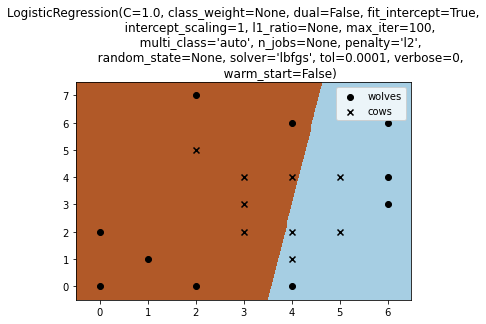

In [56]:
clf = linear_model.LogisticRegression()
clf.fit(df[train_cols], df.animal_type)
plot_results_with_hyperplane(clf, clf, df, plt_nmbr)
pl.show()

Find a fence boundary with Decision Trees

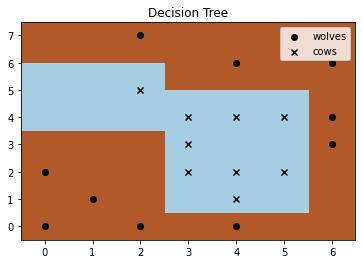

<Figure size 720x720 with 0 Axes>

In [57]:
clf = tree.DecisionTreeClassifier()
clf.fit(df[train_cols], df.animal_type)
plot_results_with_hyperplane(clf, "Decision Tree", df, 1)
pl.figure(figsize=[10,10])
pl.show()

Find the fence boundary with SVM

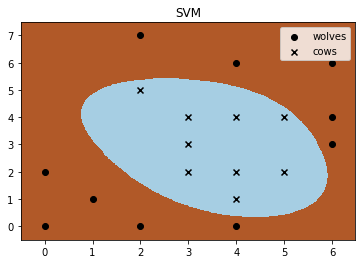

<Figure size 720x720 with 0 Axes>

In [58]:
clf = svm.SVC()
clf.fit(df[train_cols], df.animal_type)
plot_results_with_hyperplane(clf, "SVM", df, 1)
pl.figure(figsize=[10,10])
pl.show()